In [1]:
!pip install opencv-python

In [6]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
import tensorflow as tf
from keras.models import load_model
from glob import glob
import matplotlib.pyplot as plt
import os
import cv2

import zipfile

dataset_file = 'brain-tumor-mri-dataset.zip'

extract_dir = '/kaggle/working/dataset'

os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(dataset_file, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

train_dir = os.path.join(extract_dir, 'Training')
test_dir = os.path.join(extract_dir, 'Testing')

In [7]:
train_dir = "D:/Gucci/MCA/Semester 2/PDT/dataset/Training"
test_dir = "D:/Gucci/MCA/Semester 2/PDT/dataset/Testing"

In [8]:
IMAGE_SIZE = [224, 224]

In [9]:
vgg = VGG16(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)

for layer in vgg.layers:
    layer.trainable = False

In [10]:
folders = glob(f'{train_dir}/*')
print(len(folders))

4


In [11]:
x = Flatten()(vgg.output)
x = Dense(1000, activation = 'relu')(x)
prediction = Dense(len(folders), activation = 'softmax')(x)

model = Model(inputs = vgg.input, outputs = prediction)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1000)           │    25,089,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         4,004 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,807,692 (151.85 MB)

 Trainable params: 25,093,004 (95.72 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [12]:
from keras import optimizers

In [13]:
model.compile(loss = 'categorical_crossentropy', optimizer = optimizers.Adam(learning_rate = 0.001), metrics = ['accuracy', 'auc', 'precision', 'recall'])

train_datagen = ImageDataGenerator(rescale = 1./255, width_shift_range = 0.1, height_shift_range = 0.1)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
training_set = train_datagen.flow_from_directory(train_dir, 
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

testing_set = test_datagen.flow_from_directory(test_dir, 
                                               target_size = (224, 224),
                                               batch_size = 32,
                                               class_mode = 'categorical')

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [16]:
!pip install --upgrade keras

  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/8d/44/c604ecc5c9993b6574a681f2f505e980725871a89cfd9e48597b12ccb506/keras-3.3.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
    --------------------------------------- 0.0/1.1 MB 320.0 kB/s eta 0:00:04
   - -------------------------------------- 0.0/1.1 MB 325.1 kB/s eta 0:00:04
   ---- ----------------------------------- 0.1/1.1 MB 819.2 kB/s eta 0:00:02
   ------ --------------------------------- 0.2/1.1 MB 1.2 MB/s eta 0:00:01
   ------- -------------------------------- 0.2/1.1 MB 958.4 kB/s eta 0:00:01
   ---------- ----------------------------- 0.3/1.1 MB 1.1 MB/s eta 0:00:01
   -------------------- ------------------- 0.6/1.1 MB 1.7 MB/s eta 0:00:01
   ------------------------ --------------- 0.7/1.1 MB 1.8 MB/s eta 0:00:01
   -------------------------- ------------- 0.7/1.1

In [19]:
r = model.fit(training_set, validation_data = testing_set,
              epochs = 50,
              steps_per_epoch = len(training_set) // 32,
              validation_steps = len(testing_set) // 32)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.9178 - auc: 0.9926 - loss: 0.1997 - precision: 0.9158 - recall: 0.8943 - val_accuracy: 0.8438 - val_auc: 0.9829 - val_loss: 0.3300 - val_precision: 0.8387 - val_recall: 0.8125
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 0.9268 - auc: 0.9920 - loss: 0.2116 - precision: 0.9373 - recall: 0.9268 - val_accuracy: 0.8125 - val_auc: 0.9582 - val_loss: 0.4941 - val_precision: 0.8125 - val_recall: 0.8125
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 22s 5s/step - accuracy: 0.9484 - auc: 0.9971 - loss: 0.1308 - precision: 0.9484 - recall: 0.9484 - val_accuracy: 0.8750 - val_auc: 0.9938 - val_loss: 0.1696 - val_precision: 0.9032 - val_recall: 0.8750
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 22s 5s/step - accuracy: 0.9667 - auc: 0.9942 - loss: 0.1660 - precision: 0.9666 - recall: 0.9646 - val_accuracy: 0.9375 - val_auc: 0.9907 - val_loss: 0.2040 - val_precision: 0.9375 - val_recall: 0.9375
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 22s 5s/step 

41/41 ━━━━━━━━━━━━━━━━━━━━ 227s 6s/step


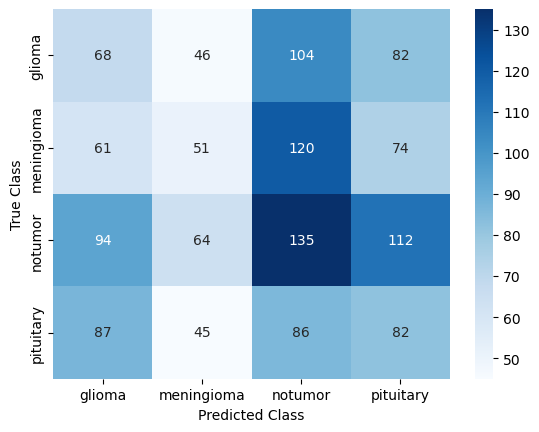

In [27]:
import numpy as np
import sklearn.metrics as metrics
import seaborn as sns
import matplotlib.pyplot as plt

predictions = model.predict(testing_set)

predicted_classes = np.argmax(predictions, axis=1)

true_classes = testing_set.labels

confusion_matrix = metrics.confusion_matrix(true_classes, predicted_classes)

class_labels = ["glioma", "meningioma", "notumor", "pituitary"]

sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

# Calculate precision, recall, and F1-score
precision = metrics.precision_score(true_classes, predicted_classes, average=None)
recall = metrics.recall_score(true_classes, predicted_classes, average=None)
f1_score = metrics.f1_score(true_classes, predicted_classes, average=None)

# Print precision, recall, and F1-score for each class
for i, label in enumerate(class_labels):
    print(f"Class: {label}")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1-score: {f1_score[i]}\n")


# Calculate overall metrics
overall_precision = metrics.precision_score(true_classes, predicted_classes, average='weighted')
overall_recall = metrics.recall_score(true_classes, predicted_classes, average='weighted')
overall_f1_score = metrics.f1_score(true_classes, predicted_classes, average='weighted')

print("Overall Metrics:")
print(f"Precision: {overall_precision}")
print(f"Recall: {overall_recall}")
print(f"F1-score: {overall_f1_score}")

Class: glioma
Precision: 0.21935483870967742
Recall: 0.22666666666666666
F1-score: 0.22295081967213112

Class: meningioma
Precision: 0.24757281553398058
Recall: 0.16666666666666666
F1-score: 0.19921875

Class: notumor
Precision: 0.30337078651685395
Recall: 0.3333333333333333
F1-score: 0.3176470588235294

Class: pituitary
Precision: 0.2342857142857143
Recall: 0.2733333333333333
F1-score: 0.2523076923076923

Overall Metrics:
Precision: 0.25531244545487525
Recall: 0.2562929061784897
F1-score: 0.25338333327038626


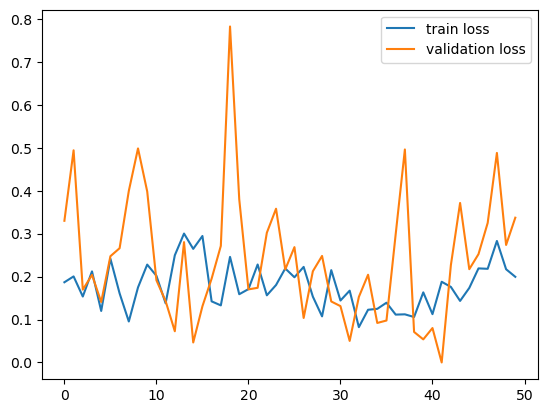

In [20]:
# Loss curve

plt.plot(r.history['loss'], label = 'train loss')
plt.plot(r.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()

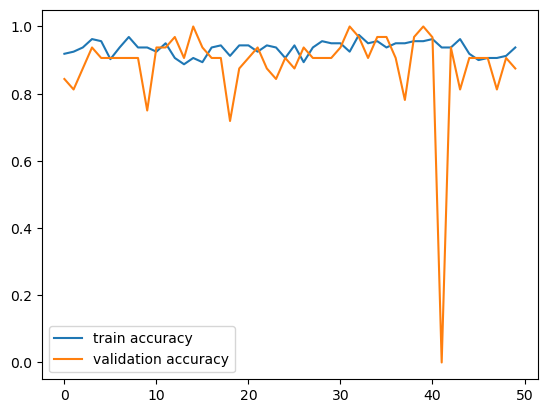

In [21]:
# Accuracy curve

plt.plot(r.history['accuracy'], label = 'train accuracy')
plt.plot(r.history['val_accuracy'], label = 'validation accuracy')
plt.legend()
plt.show()

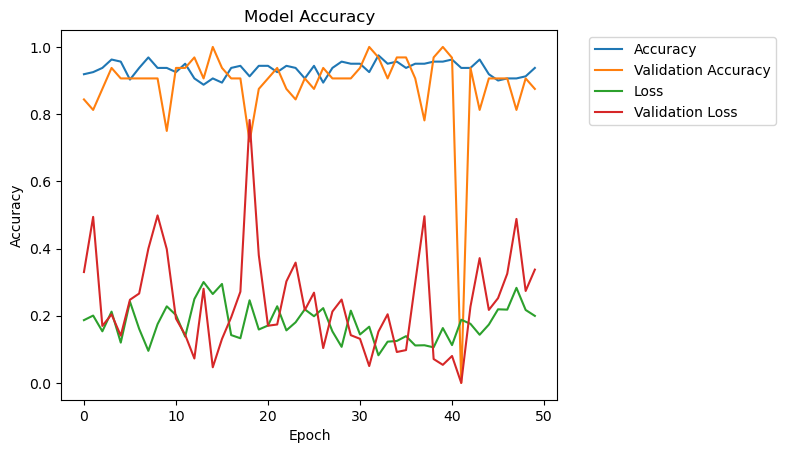

In [22]:
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy", "Validation Accuracy", "Loss", "Validation Loss"], loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()

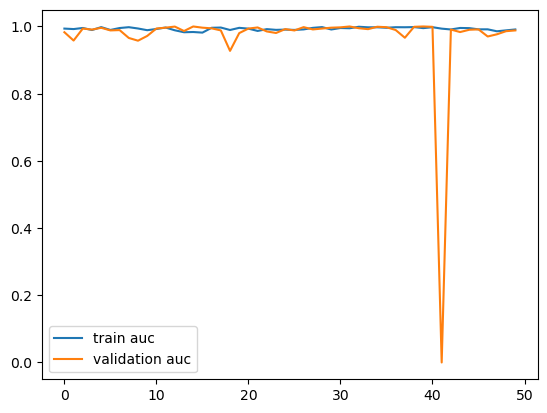

In [23]:
# AUC curve

plt.plot(r.history['auc'], label = 'train auc')
plt.plot(r.history['val_auc'], label = 'validation auc')
plt.legend()
plt.show()

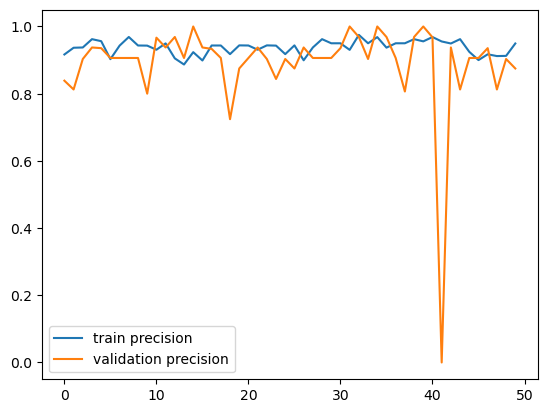

In [24]:
# Precision curve

plt.plot(r.history['precision'], label = 'train precision')
plt.plot(r.history['val_precision'], label = 'validation precision')
plt.legend()
plt.show()

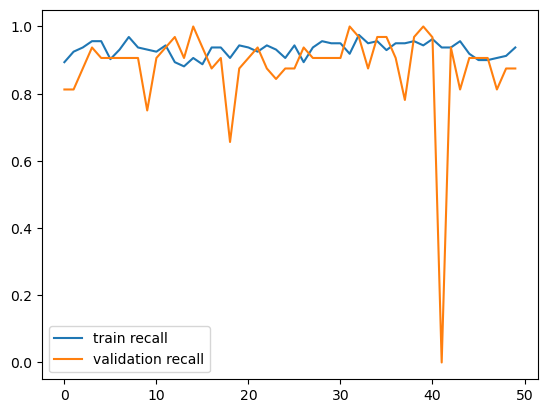

In [25]:
# Recall curve

plt.plot(r.history['recall'], label = 'train recall')
plt.plot(r.history['val_recall'], label = 'validation recall')
plt.legend()
plt.show()

In [28]:
import pickle

model_vgg_tacc = r.history["accuracy"]
model_vgg_vacc = r.history["val_accuracy"]
model_vgg_tloss = r.history["loss"]
model_vgg_vloss = r.history["val_accuracy"]

metrics_dict1 = {
    'VGG16': {
        'train accuracies': model_vgg_tacc,
        'val accuracies': model_vgg_vacc,
        'train losses': model_vgg_tloss,
        'val losses': model_vgg_vloss
    }
}

with open('model_metrics.pkl', 'wb') as file:
    pickle.dump(metrics_dict1, file)